<a href="https://colab.research.google.com/github/Shavrau/AVA1-AM-Spotify/blob/main/artistas_escalonamento_nomeado_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de bibliotecas

In [ ]:
!pip install spotipy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import requests
import base64
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle


#Carregamento do dataset

In [ ]:
CLIENT_ID = '5d6396e8ea294d0982be0aa32d871bf7'
CLIENT_SECRET = '959fbe6295a9493cac1be0a1c4f6aa6c'

def autenticar_spotify():
    auth_manager = SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET
    )
    return spotipy.Spotify(auth_manager=auth_manager)

sp = autenticar_spotify()

In [ ]:
def obter_dados_artistas(ids_artistas):
    artistas = sp.artists(ids_artistas)['artists']
    dados = []

    for artista in artistas:
        dados.append({
            'artist_id': artista['id'],
            'artist_name': artista['name'],
            'followers': artista['followers']['total'],
            'popularity': artista['popularity'],
            'genres': ', '.join(artista['genres']),
            'num_genres': len(artista['genres'])
        })

    return pd.DataFrame(dados)

In [ ]:
def obter_dados_em_lote(ids_artistas, tamanho_lote=50):
    dados = []
    for i in range(0, len(ids_artistas), tamanho_lote):
        lote = ids_artistas[i:i + tamanho_lote]
        dados.extend(obter_dados_artistas(lote).to_dict('records'))
    return pd.DataFrame(dados)

In [ ]:
def buscar_ids_artistas_por_genero(genero, limite=50):
    resultados = sp.search(q=f'genre:{genero}', type='artist', limit=limite)
    return [artista['id'] for artista in resultados['artists']['items']]

In [ ]:
def buscar_ids_por_generos(generos, limite_por_genero=50):
    ids = []
    for genero in generos:
        try:
            resultados = buscar_ids_artistas_por_genero(genero, limite=limite_por_genero)
            ids.extend(resultados)
        except Exception as e:
            print(f"Erro ao buscar artistas do gênero '{genero}': {e}")
    return list(set(ids))


In [ ]:
generos = [
    'acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime',
    'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat',
    'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical',
    'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house',
    'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
    'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage',
    'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy',
    'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays',
    'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial',
    'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids',
    'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore',
    'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera',
    'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep',
    'power-pop', 'progressive-house', 'psych-rock', 'punk', 'punk-rock',
    'r-n-b', 'rainy-day', 'reggae', 'reggaeton', 'road-trip', 'rock', 'rock-n-roll',
    'rockabilly', 'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes',
    'singer-songwriter', 'ska', 'sleep', 'songwriter', 'soul', 'soundtracks',
    'spanish', 'study', 'summer', 'swedish', 'synth-pop', 'tango', 'techno',
    'trance', 'trip-hop', 'turkish', 'work-out', 'world-music'
]

ids_artistas = buscar_ids_por_generos(generos, limite_por_genero=50)
df_artistas = obter_dados_em_lote(ids_artistas)
print(f"Total de artistas coletados: {len(df_artistas)}")
df_artistas

Total de artistas coletados: 4318


,artist_id,artist_name,followers,popularity,genres,num_genres
0,2Sa4c9qKaI7ILJs8D6gUCh,Ghastly,158937,46,"bass house, dubstep, edm, riddim",4
1,7GgR71h3yQSxU4bwfX9gRd,Malle Anja,5528,49,"schlagerparty, schlager",2
2,1hQuWl1dueM7ChRUZRn05z,Opus III,25583,51,,0
3,2B7camiqgR0ErfveavlNIG,Folder 5,14739,41,anime,1
4,0hCWVMGGQnRVfDgmhwLIxq,sakanaction,1520585,70,"j-pop, j-rock, japanese indie",3
...,...,...,...,...,...,...
4313,0pWR7TsFhvSCnbmHDjWgrE,Creepy Nuts,1847696,74,"anime, j-pop, j-rap",3
4314,64Tp3pyyHag0ngw5SLchgY,Kings of Günter,11576,54,"schlagerparty, schlager",2
4315,7nkLRaWHImCvWGHdNGnhVE,Ten Years After,599475,59,"blues rock, psychedelic rock",2
4316,1EJWNhiYbOyeUHbsS7Kp1P,Sneaker Pimps,284456,51,trip hop,1


#Exploração Inicial

In [ ]:
df_artistas.describe()

,followers,popularity,num_genres
count,4.318000e+03,4318.000000,4318.000000
mean,2.240356e+06,57.448587,2.327003
std,7.226807e+06,16.732952,1.791693
min,0.000000e+00,0.000000,0.000000
25%,6.924150e+04,50.000000,1.000000
50%,3.771115e+05,59.000000,2.000000
75%,1.575412e+06,68.000000,3.000000
max,1.363225e+08,100.000000,12.000000


In [ ]:
df_artistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_id    4318 non-null   object
 1   artist_name  4318 non-null   object
 2   followers    4318 non-null   int64 
 3   popularity   4318 non-null   int64 
 4   genres       4318 non-null   object
 5   num_genres   4318 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 202.5+ KB


In [ ]:
df_artistas.isnull().sum()

,0
artist_id,0
artist_name,0
followers,0
popularity,0
genres,0
num_genres,0


In [ ]:
df_artistas = df_artistas[df_artistas['followers'] >= 1000]

In [ ]:
df_artistas['log_followers'] = np.log1p(df_artistas['followers'])

<ipython-input-14-0cbc3b566416>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_artistas['log_followers'] = np.log1p(df_artistas['followers'])


In [ ]:
df_artistas['faixa_popularidade_nomeada'] = df_artistas['followers'].apply(
    lambda x: (
        'Ícones Globais' if x > 150_000_000 else
        'Superestrelas' if x > 100_000_000 else
        'Estrelas Internacionais' if x > 50_000_000 else
        'Alta Popularidade' if x > 25_000_000 else
        'Emergentes Globais' if x > 10_000_000 else
        'Mainstream Regional' if x > 1_000_000 else
        'Promissores' if x > 500_000 else
        'Artistas de Nicho' if x > 100_000 else
        'Nova Cena' if x > 50_000 else
        'Descobertas Locais'
    )
)


<ipython-input-15-46a0162003e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_artistas['faixa_popularidade_nomeada'] = df_artistas['followers'].apply(


In [ ]:
df_artistas

,artist_id,artist_name,followers,popularity,genres,num_genres,log_followers,faixa_popularidade_nomeada
0,2Sa4c9qKaI7ILJs8D6gUCh,Ghastly,158937,46,"bass house, dubstep, edm, riddim",4,11.976269,Artistas de Nicho
1,7GgR71h3yQSxU4bwfX9gRd,Malle Anja,5528,49,"schlagerparty, schlager",2,8.617762,Descobertas Locais
2,1hQuWl1dueM7ChRUZRn05z,Opus III,25583,51,,0,10.149722,Descobertas Locais
3,2B7camiqgR0ErfveavlNIG,Folder 5,14739,41,anime,1,9.598320,Descobertas Locais
4,0hCWVMGGQnRVfDgmhwLIxq,sakanaction,1520585,70,"j-pop, j-rock, japanese indie",3,14.234606,Mainstream Regional
...,...,...,...,...,...,...,...,...
4313,0pWR7TsFhvSCnbmHDjWgrE,Creepy Nuts,1847696,74,"anime, j-pop, j-rap",3,14.429451,Mainstream Regional
4314,64Tp3pyyHag0ngw5SLchgY,Kings of Günter,11576,54,"schlagerparty, schlager",2,9.356776,Descobertas Locais
4315,7nkLRaWHImCvWGHdNGnhVE,Ten Years After,599475,59,"blues rock, psychedelic rock",2,13.303811,Promissores
4316,1EJWNhiYbOyeUHbsS7Kp1P,Sneaker Pimps,284456,51,trip hop,1,12.558337,Artistas de Nicho


# Visualização e Graficos

<ipython-input-17-507020e064b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


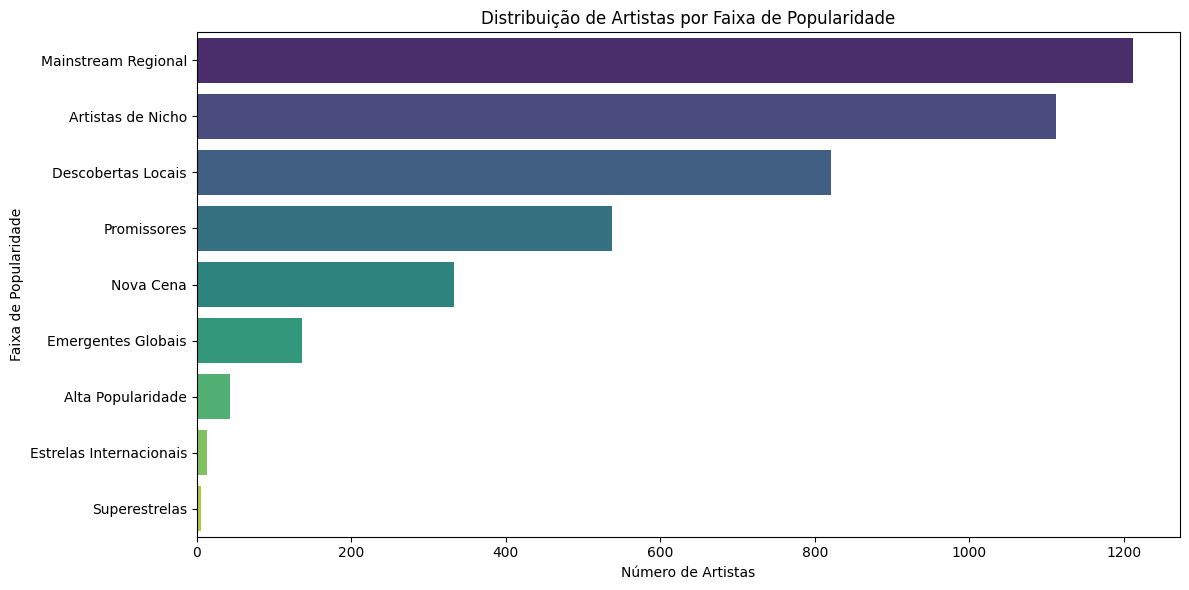

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_artistas,
    y='faixa_popularidade_nomeada',
    order=df_artistas['faixa_popularidade_nomeada'].value_counts().index,
    palette='viridis'
)
plt.title('Distribuição de Artistas por Faixa de Popularidade')
plt.xlabel('Número de Artistas')
plt.ylabel('Faixa de Popularidade')
plt.tight_layout()
plt.show()

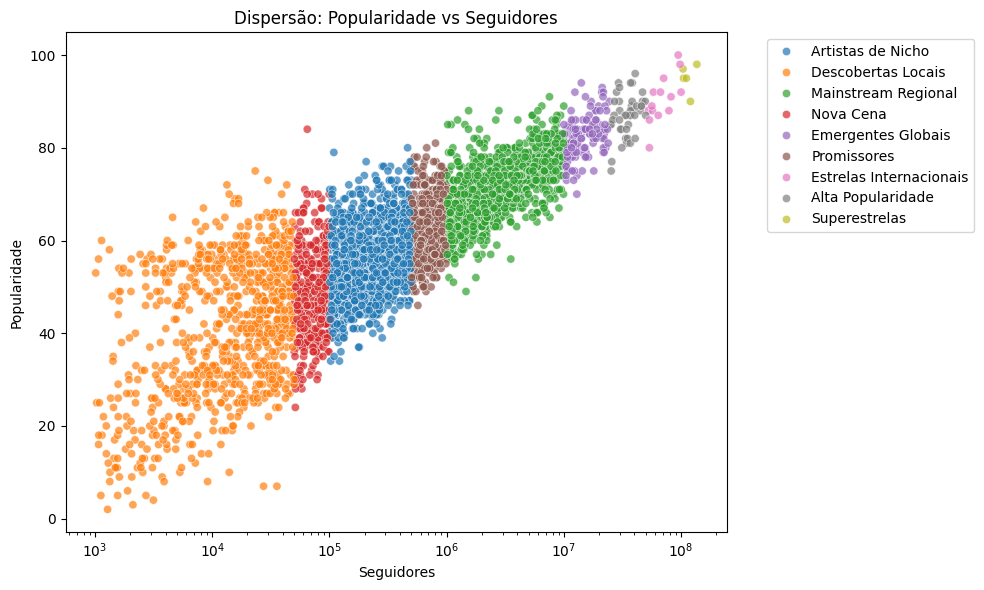

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_artistas,
    x='followers',
    y='popularity',
    hue='faixa_popularidade_nomeada',
    palette='tab10',
    alpha=0.7
)
plt.title('Dispersão: Popularidade vs Seguidores')
plt.xlabel('Seguidores')
plt.ylabel('Popularidade')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-19-c28361ecd018>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


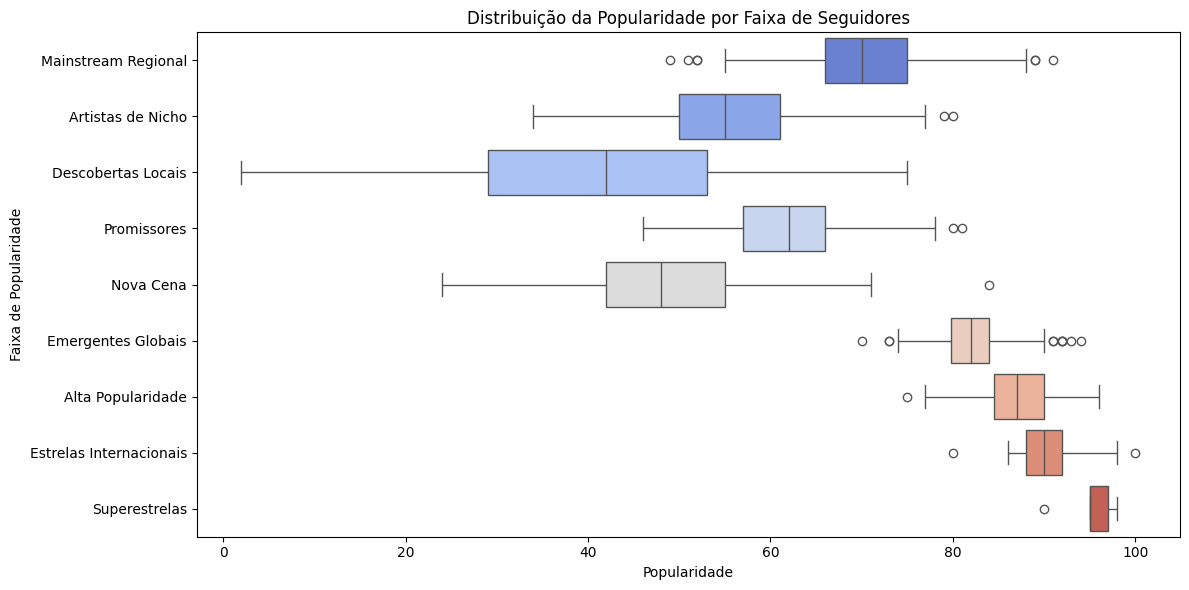

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_artistas,
    y='faixa_popularidade_nomeada',
    x='popularity',
    order=df_artistas['faixa_popularidade_nomeada'].value_counts().index,
    palette='coolwarm'
)
plt.title('Distribuição da Popularidade por Faixa de Seguidores')
plt.xlabel('Popularidade')
plt.ylabel('Faixa de Popularidade')
plt.tight_layout()
plt.show()


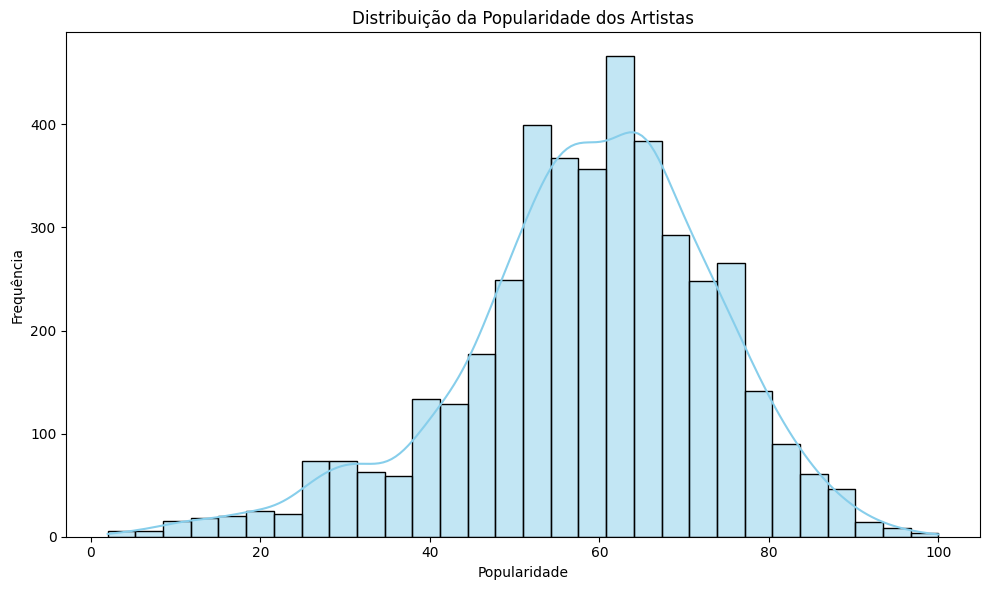

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_artistas,
    x='popularity',
    bins=30,
    kde=True,
    color='skyblue'
)
plt.title('Distribuição da Popularidade dos Artistas')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


<ipython-input-21-ee2ba46326a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


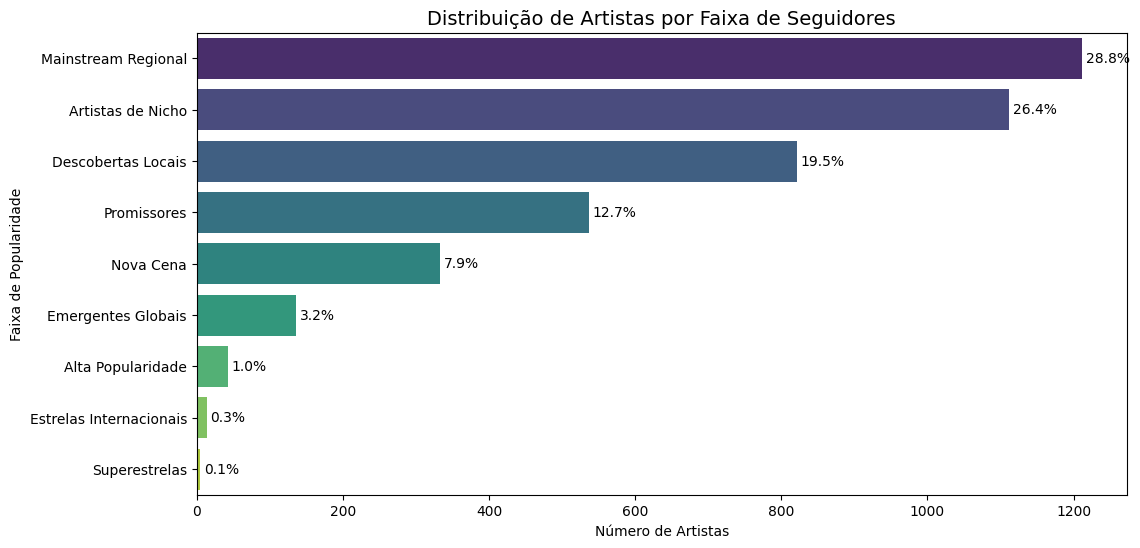

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_artistas,
    y='faixa_popularidade_nomeada',
    order=df_artistas['faixa_popularidade_nomeada'].value_counts().index,
    palette='viridis'
)
plt.title('Distribuição de Artistas por Faixa de Seguidores', fontsize=14)
plt.xlabel('Número de Artistas')
plt.ylabel('Faixa de Popularidade')

# Adicionar rótulos de porcentagem
total = len(df_artistas)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%'
    x = p.get_width() + 5
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), va='center')

plt.show()

<ipython-input-22-e3acd3be00e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


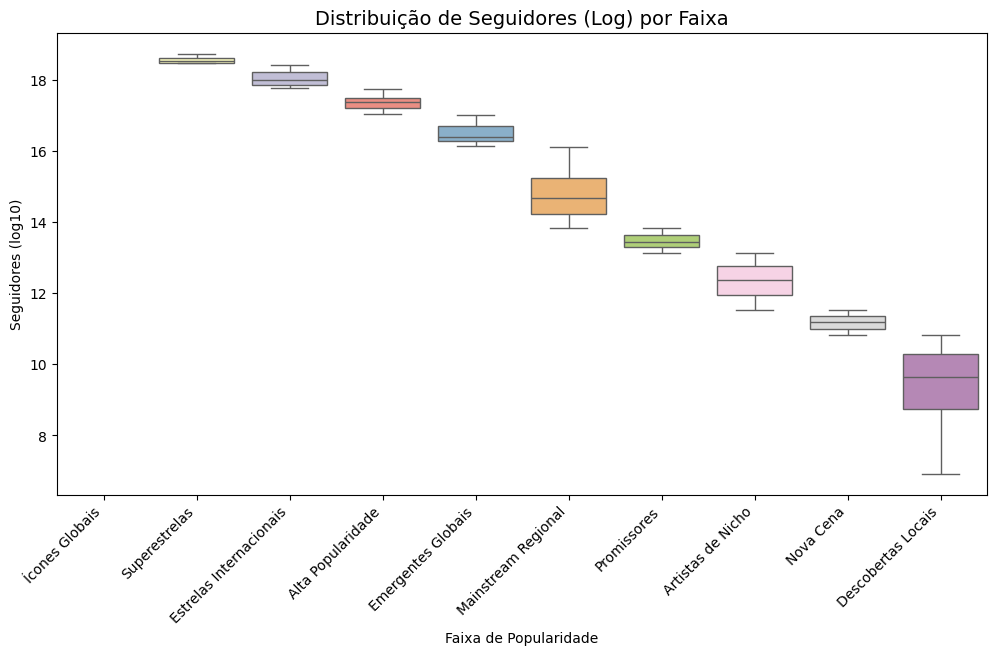

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_artistas,
    x='faixa_popularidade_nomeada',
    y='log_followers',
    order=[
        'Ícones Globais', 'Superestrelas', 'Estrelas Internacionais',
        'Alta Popularidade', 'Emergentes Globais', 'Mainstream Regional',
        'Promissores', 'Artistas de Nicho', 'Nova Cena', 'Descobertas Locais'
    ],
    palette='Set3'
)
plt.title('Distribuição de Seguidores (Log) por Faixa', fontsize=14)
plt.xlabel('Faixa de Popularidade')
plt.ylabel('Seguidores (log10)')
plt.xticks(rotation=45, ha='right')
plt.show()

#Transformação dos dados com MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = ['popularity', 'log_followers', 'num_genres']
X = df_artistas[features]

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=[f'{col}_scaled' for col in features],
    index=df_artistas.index
)

df_artistas = pd.concat([df_artistas, df_scaled], axis=1)

print(df_artistas[['popularity', 'popularity_scaled']].head())


   popularity  popularity_scaled
0          46           0.448980
1          49           0.479592
2          51           0.500000
3          41           0.397959
4          70           0.693878


#Separador de base de testes

In [ ]:
X = df_artistas[['popularity_scaled', 'log_followers_scaled', 'num_genres_scaled']]
y = df_artistas['faixa_popularidade_nomeada']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0
)

In [ ]:
X_train.shape,X_test.shape

((2949, 3), (1264, 3))

In [ ]:
y_train.shape,y_test.shape

((2949,), (1264,))

#Exportação para base binaria

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/ColabNotebooks/spotify_model.pkl', 'wb') as f:
    pickle.dump([X_train, y_train, X_test, y_test], f)